In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [12]:
# Example: Load data into pandas DataFrame
movies_df = pd.read_csv('./ml-latest-small/movies.csv')
ratings_df = pd.read_csv('./ml-latest-small/ratings.csv')

# Create a dictionary to map movie IDs to their names
movie_names = dict(zip(movies_df.movieId, movies_df.title))

In [4]:
# Create an empty graph
G = nx.Graph()

# Add nodes for users and movies
for _, row in ratings_df.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    rating = row['rating']

    # Add nodes
    G.add_node(user_id, type='user')
    G.add_node(movie_id, type='movie')

    # Add an edge between the user and the movie
    # You can include the rating as an edge attribute
    G.add_edge(user_id, movie_id, rating=rating)


Plot the Social Network

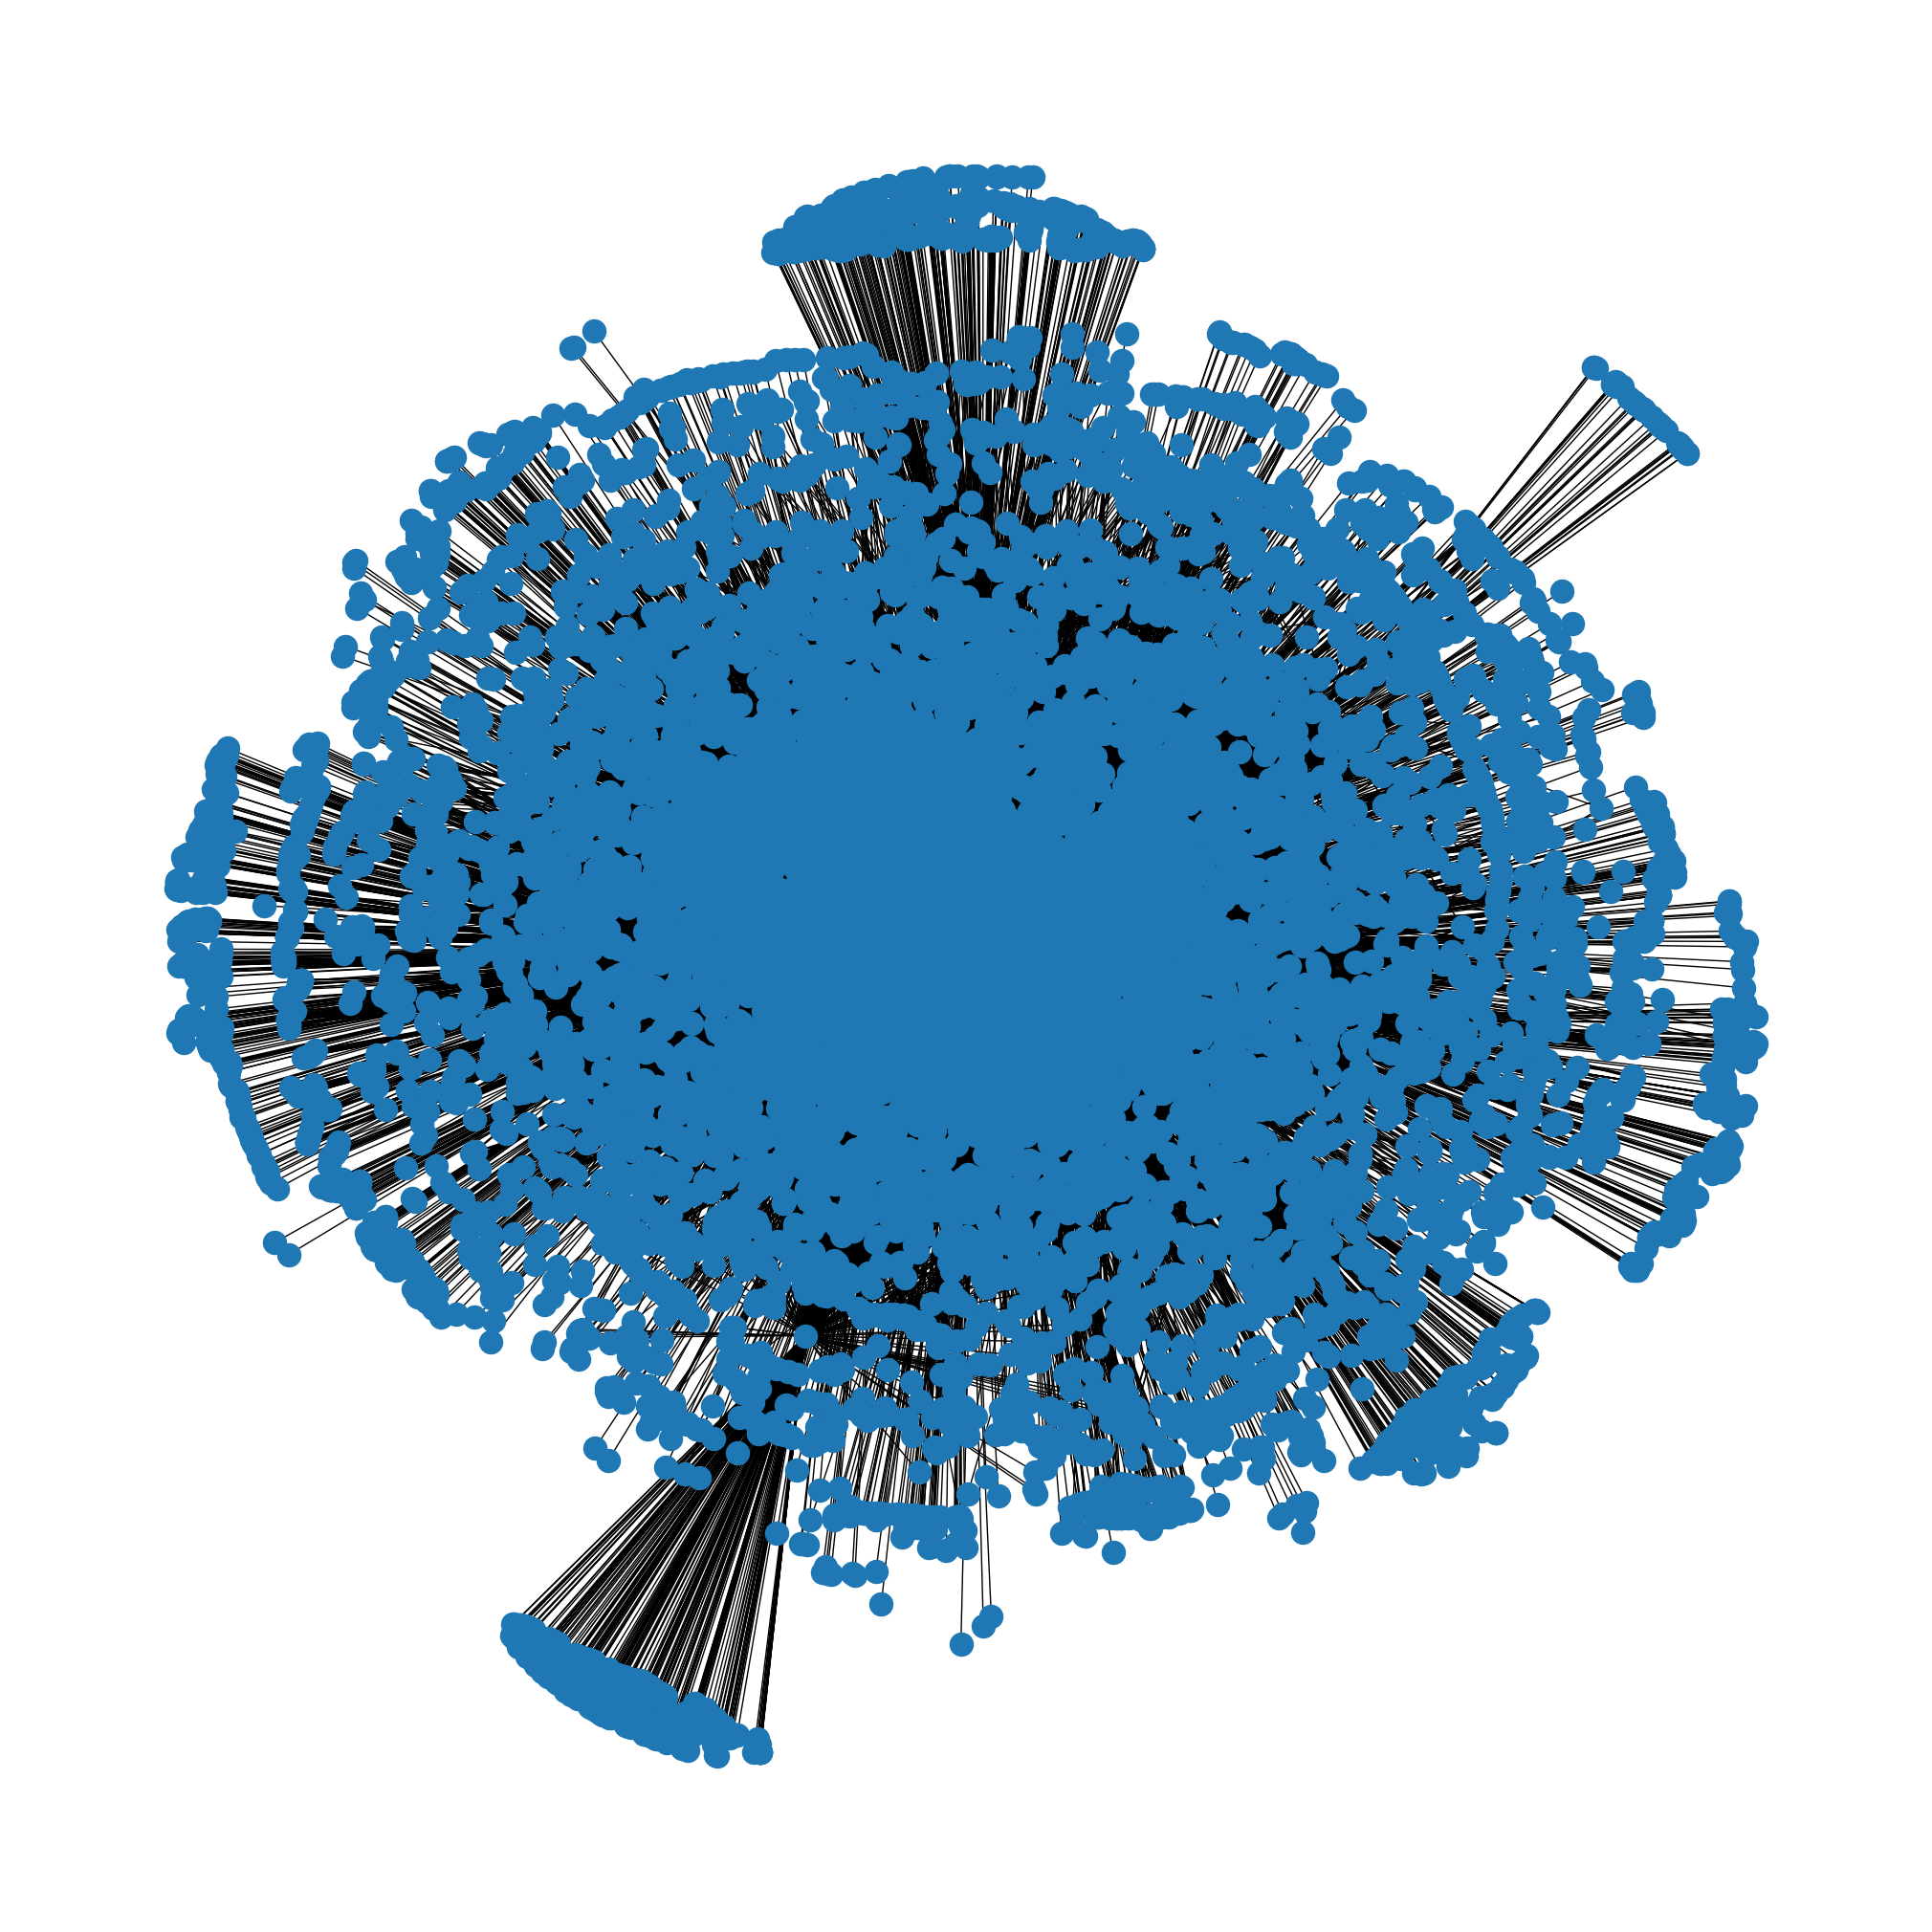

In [10]:
plt.figure(3, figsize=(20,20))
nx.draw(G, with_labels=False)
plt.show()

Calculate the degree of each movie

In [27]:
# Calculate the degree of each movie
movie_degrees = {n: d for n, d in G.degree() if G.nodes[n].get('type') == 'movie'}

In [ ]:
# Display the degrees
for movie_id, degree in movie_degrees.items():
    movie_name = movie_names.get(movie_id, "Unknown Movie")
    print(f"Movie '{movie_name}' (ID {movie_id}) has a degree of {degree}")

In [17]:
max(movie_degrees.values())

2701

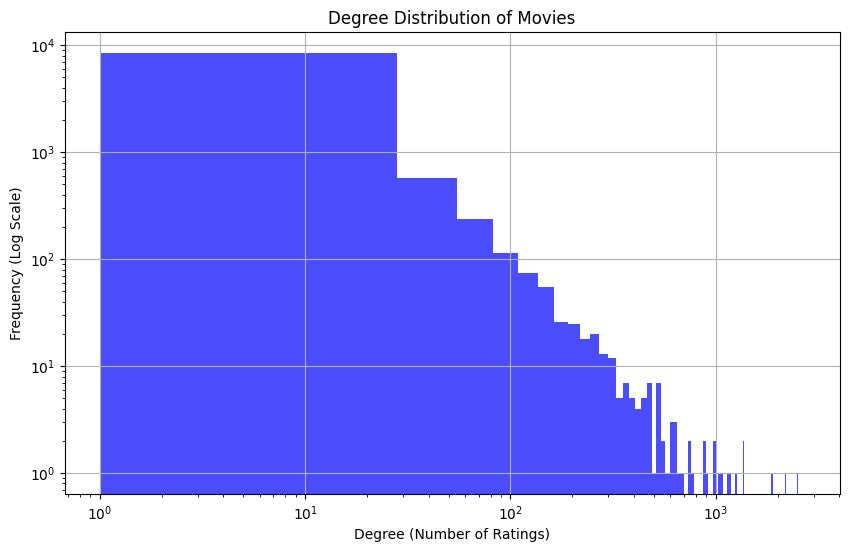

In [20]:
movie_degrees = [d for n, d in G.degree() if G.nodes[n].get('type') == 'movie']

# Plotting the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(movie_degrees, bins=100, log=True, color='blue', alpha=0.7)
plt.title('Degree Distribution of Movies')
plt.xlabel('Degree (Number of Ratings)')
plt.ylabel('Frequency (Log Scale)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


Largest Subgraph

In [24]:
# Find all connected components, sorted by size
connected_components = sorted(nx.connected_components(G), key=len, reverse=True)

# Get the largest connected component
largest_cc = connected_components[0]

# Create a subgraph from the largest connected component
largest_subgraph = G.subgraph(largest_cc).copy()

# Info about the largest subgraph
print(f"The largest subgraph has {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} edges.")
print(f"The Graph is " + "Connected" if nx.is_connected(G) == True else "Not Connected")

The largest subgraph has 9811 nodes and 100403 edges.
The Graph is Connected


In [29]:
movie_degrees = {n: d for n, d in G.degree() if G.nodes[n].get('type') == 'movie'}

The Most Influenced Movies

In [35]:
# Number of top movies you want to find
n = 5 

# Sort the movies by degree, in descending order
sorted_movies = sorted(movie_degrees.items(), key=lambda item: item[1], reverse=True)

# Get the top n movies
top_n_movies = sorted_movies[:n]

# Retrieve the names of these top n movies
top_n_movie_names = [(movie_names.get(movie_id, "Unknown Movie"), degree) for movie_id, degree in top_n_movies]

# Now top_n_movie_names contains the names and degrees of the top n movies
print(f"Top {n} Movies with the Highest Degree:")
for movie, degree in top_n_movie_names:
    print(f"{movie} - Degree: {degree}")


Top 5 Movies with the Highest Degree:
Air Up There, The (1994) - Degree: 2701
Wild Bunch, The (1969) - Degree: 2486
In the Line of Fire (1993) - Degree: 2162
Fearless (1993) - Degree: 1871
True Lies (1994) - Degree: 1370


Centrality Measurements

In [ ]:
def get_movie_name(movie_id):
    return movie_names.get(movie_id, "Unknown Movie")

# Modify the printing function to include movie names
def print_top_5_centrality(centrality_dict, centrality_name):
    top_5 = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Top 5 Movies in {centrality_name} Centrality:")
    for movie_id, centrality_score in top_5:
        movie_name = get_movie_name(movie_id)
        print(f"{movie_name} (ID {movie_id}): {centrality_score:.5f}")

# Calculate centralities
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G)

# Print the top 5 for each centrality
print_top_5_centrality(betweenness_centrality, "Betweenness")
print_top_5_centrality(eigenvector_centrality, "Eigenvector")
print_top_5_centrality(closeness_centrality, "Closeness")
print_top_5_centrality(degree_centrality, "Degree")
